In [6]:
# -*- coding: utf-8 -*-
"""
TA Workshop: Text Preparation (DTM)
"""
import nltk
from nltk.corpus import reuters
from nltk import FreqDist, SnowballStemmer
import string
from nltk.corpus import stopwords

nltk.download('reuters')

[nltk_data] Downloading package reuters to /home/jovyan/nltk_data...


True

No. of documents:  10788


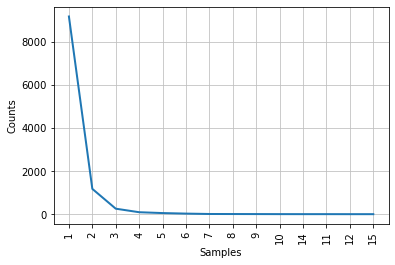

In [7]:
# We'll use the reuters corpus in NLTK.
# The same steps of preprocessing can be done on documents read in from external files.

# How many files are there in the corpus?
# What are their categories? Single or multiple categories for one file?
print("No. of documents: ", len(reuters.fileids()))
cats = [ reuters.categories(f) for f in reuters.fileids() ]
cat_num = [ len(c) for c in cats ]
fd_num = FreqDist(cat_num)
fd_num.plot()

In [9]:
# How many documents are there in each category?
# FreqDist() can be used to find the answer, but we need to flatten the list of categories first.
cats_flat = [ c for l in cats for c in l ]
fd_cat = FreqDist(cats_flat)
# how many categories in total
print (len(fd_cat))
fd_cat.most_common(20)

90


[('earn', 3964),
 ('acq', 2369),
 ('money-fx', 717),
 ('grain', 582),
 ('crude', 578),
 ('trade', 485),
 ('interest', 478),
 ('ship', 286),
 ('wheat', 283),
 ('corn', 237),
 ('dlr', 175),
 ('money-supply', 174),
 ('oilseed', 171),
 ('sugar', 162),
 ('coffee', 139),
 ('gnp', 136),
 ('veg-oil', 124),
 ('gold', 124),
 ('soybean', 111),
 ('nat-gas', 105)]

In [10]:
# Let's pick two categories and visualize the articles in each category using word cloud
grain = reuters.fileids('grain')
trade = reuters.fileids('trade')

grain_tok = [ reuters.words(f) for f in grain ] 
trade_tok = [ reuters.words(f) for f in trade ] 

In [11]:
#Let's define a function preprocess() to perform the preprocessing steps given a file (token list):
#   punctuation removal, case lowering, stopword removal, 
#   stemming/lemmatization, further cleaning
stop = stopwords.words('english')+['would', 'could']
snowball = SnowballStemmer('english')

def preprocess(toks):
    toks = [ t.lower() for t in toks if t not in string.punctuation+"’“”" ]
    toks = [t for t in toks if t not in stop ]
    toks = [ t for t in toks if not t.isnumeric() ]
    toks = [ snowball.stem(t) for t in toks ]
    return toks

In [12]:
# Preprocess each file in each category
grain_clean = [ preprocess(f) for f in grain_tok ]
trade_clean = [ preprocess(f) for f in trade_tok ]

# Flatten the list of lists for FreqDist; break the docs
grain_flat = [ c for l in grain_clean for c in l ]
trade_flat = [ c for l in trade_clean for c in l ]

fd_grain = FreqDist(grain_flat)
fd_trade = FreqDist(trade_flat)

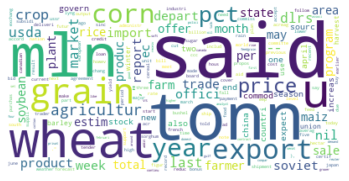

In [13]:
# Generate word clouds for the two categories.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_grain = WordCloud(background_color="white").generate_from_frequencies(fd_grain)
plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()

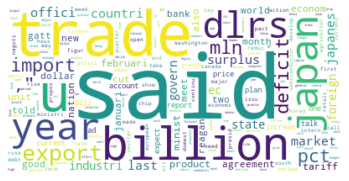

In [14]:
wc_trade = WordCloud(background_color="white").generate_from_frequencies(fd_trade)
plt.imshow(wc_trade, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
# Finally, how to generate TDM

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# sklearn requires the input to be text string
# Switch back to the docs format before flatten 
grain_text = [ ' '.join(f) for f in grain_clean ]

In [16]:
# Create a matrix using term frequency first using CountVectorizer
# The result is in sparse matrix format
vec_tf = CountVectorizer()
grain_tf = vec_tf.fit_transform(grain_text)
grain_tf

<582x4156 sparse matrix of type '<class 'numpy.int64'>'
	with 34272 stored elements in Compressed Sparse Row format>

In [17]:
# Where are the columns and rows then?
vec_tf.get_feature_names()[:20]

['1960s',
 '1970s',
 '2und',
 '5c',
 'abandon',
 'abastecimento',
 'abastecimiento',
 'abil',
 'abl',
 'abnorm',
 'abolish',
 'abolit',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'abund',
 'abus',
 'acceler',
 'accept']

In [18]:
# index of a specific word
vec_tf.vocabulary_["grain"]

1576

In [19]:
# to convert it to a normal array
grain_tf_m = grain_tf.toarray()

In [20]:
# you can set a minimum DF
vec_tf_2 = CountVectorizer(min_df = 2)
grain_tf_2 = vec_tf_2.fit_transform(grain_text)
grain_tf_2

<582x2491 sparse matrix of type '<class 'numpy.int64'>'
	with 32607 stored elements in Compressed Sparse Row format>

In [21]:
# and activate stopword removal
vec_tf_3 = CountVectorizer(min_df = 2, stop_words='english')
grain_tf_3 = vec_tf_3.fit_transform(grain_text)
grain_tf_3

<582x2392 sparse matrix of type '<class 'numpy.int64'>'
	with 29950 stored elements in Compressed Sparse Row format>

In [22]:
# To have binary indexing, set "binary=True"
vec_bin = CountVectorizer(binary=True, min_df = 2)
grain_bin = vec_bin.fit_transform(grain_text)
grain_bin.toarray()[:10, :20] #[4, 13]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [23]:
# And tfidf indexing
vec_tfidf = TfidfVectorizer(min_df = 2)
grain_tfidf = vec_tfidf.fit_transform(grain_text)
grain_tfidf
grain_tfidf.toarray()[:10, :20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [26]:
# To save the vectorized results for future use
import pickle
pickle.dump(grain_tfidf, open("Nachiketh Doraiswamy-tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("feature.pkl","wb"))

In [27]:
#load the content
loaded_vec = TfidfVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))
tfidf = pickle.load(open("Nachiketh Doraiswamy-tfidf.pkl", "rb" ) )
tfidf

<582x2491 sparse matrix of type '<class 'numpy.float64'>'
	with 32607 stored elements in Compressed Sparse Row format>